In [68]:
#Importing libraries
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
from kydavra import PointBiserialCorrSelector
from sklearn.decomposition import PCA

In [6]:
#Readind our new cleaned dataset
df = pd.read_csv('data2.csv')
#Removing first column
df = df.drop(['Unnamed: 0'], axis = 1)
df

,age,workclass,education.num,marital.status,occupation,capital.gain,capital.loss,hours.per.week,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,income
0,82.0,0.73885,9.0,0.027346,0.484014,0.0,4356.0,18.0,0.0,0.0,0.0,1.0,0.0,0.0
1,54.0,0.73885,4.0,0.138616,0.124875,0.0,3900.0,40.0,0.0,0.0,0.0,1.0,0.0,0.0
2,41.0,0.73885,10.0,0.031219,0.449034,0.0,3900.0,40.0,0.0,0.0,0.0,1.0,0.0,0.0
3,34.0,0.73885,9.0,0.138616,0.041578,0.0,3770.0,45.0,0.0,0.0,0.0,1.0,0.0,0.0
4,38.0,0.73885,6.0,0.031219,0.134483,0.0,3770.0,40.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30713,22.0,0.73885,10.0,0.322677,0.325116,0.0,0.0,40.0,0.0,0.0,0.0,1.0,1.0,0.0
30714,27.0,0.73885,12.0,0.466795,0.304957,0.0,0.0,38.0,0.0,0.0,0.0,1.0,0.0,0.0
30715,40.0,0.73885,9.0,0.466795,0.124875,0.0,0.0,40.0,0.0,0.0,0.0,1.0,1.0,1.0
30716,58.0,0.73885,9.0,0.027346,0.134483,0.0,0.0,40.0,0.0,0.0,0.0,1.0,0.0,0.0


In [28]:
#Defining X dataframe with features and y with target column
X = df.iloc[:,0:13]
y = df.iloc[:,13]

I will use 3 different feature selection models.

## SelectKBest

In [41]:
#Instantiation SelectKBest
model = SelectKBest(score_func=chi2, k=13)
#Fitting the model
fit = model.fit(X.values,y.values)
#Storing scores and columns
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#Creating a dataframe to store scores by columns
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']
#printing the columns in descending order of their score
featureScores.nlargest(20,'Score')['Features']


,Features,Score
5,capital.gain,7.685745e+07
6,capital.loss,1.304208e+06
0,age,8.081294e+03
7,hours.per.week,5.628406e+03
2,education.num,2.229613e+03
12,sex_Male,4.659813e+02
4,occupation,3.428501e+02
9,race_Black,2.206316e+02
3,marital.status,2.095631e+02
1,workclass,7.062023e+01


We have our features in the descending order of their scores - I will use the first 9 ones for certain models when creating them.

In [96]:
#Getting the first 9 more important columns in a list
col1 = featureScores.nlargest(20,'Score').iloc[:9, :-1].values

## ExtraTreesClassifier

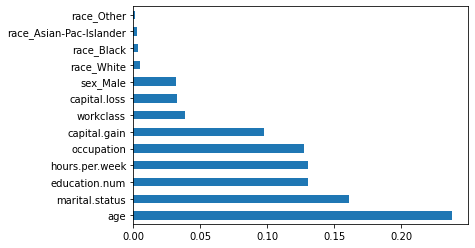

In [45]:
#Instantiating ExtraTreesClassifier
model = ExtraTreesClassifier()
#Fitting the model
model.fit(X,y)
#Plotting the results
features = pd.Series(model.feature_importances_, index=X.columns)
features.nlargest(15).plot(kind='barh')
plt.show()

We can see that now we have some different features considered the best, which was expected to. The ExtraTreesClassifier is best to be used with Tree Based Classifiers, which I will do when creating the model. I will also use the first 9 (from the bottom up)

In [107]:
#Getting the first 9 more important columns in a list
col2 = ['age', 'workclass', 'education.num', 'marital.status', 'occupation','capital.gain','capital.loss','hours.per.week','sex_Male']

## PointBiserialCorrSelector

In [64]:
#Instantiating the model
pbs = PointBiserialCorrSelector()
#Saving column names
col = pbs.select( df, target='income' )

In [109]:
col

['education.num',
 'marital.status',
 'occupation',
 'age',
 'capital.gain',
 'hours.per.week',
 'sex_Male']

In [108]:
#Getting the first 7 more important columns in a list
col3 = col

array([0.238, 0.161, 0.131, 0.13 , 0.127, 0.098, 0.038, 0.033, 0.032,
       0.005])

We can see that PointBiserialCorrSelector from Kydavra selected the 6 columns with highest importance that were also found in ExtraTreesClassifier in the first places + sex_Male column, that, from my point of view is also very important and the model did well choosing it.

We'll train some models in the next notebook on each of the columns selecten to see the accuracy on each of them